In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import fiona
import geopandas as gpd

shapefile = "/Users/zenodeangeli/Desktop/IndividualProject/data/ne_110m_admin_0_countries.shp"
geo_df = gpd.read_file(shapefile)

## Get Data

In [49]:
country_names = ['France','Germany','Italy','Spain','UK']
data = {}
sd = {}
for country in country_names:
    df_before = pd.read_csv('mcmc_data/'+country+"/fLock_before.csv")
    df_after = pd.read_csv('mcmc_data/'+country+"/fLock_after.csv")
    data[country] = [df_before.loc[4][1],df_after.loc[4][1]]
    sd[country] = [df_before.loc[4][2], df_after.loc[4][2]]

In [50]:
sd

{'France': [0.70086, 0.03202],
 'Germany': [0.61859, 0.04126],
 'Italy': [0.11751, 0.01248],
 'Spain': [1.56467, 0.01325],
 'UK': [0.05742, 0.00424]}

In [36]:
list(data.values())

[[3.49286, 1.11192],
 [3.20158, 1.13869],
 [1.52632, 1.05137],
 [2.45252, 1.04717],
 [1.25934, 1.03214]]

## Bar Plot

### First Lockdown

In [129]:
def barplotReproduction(df, df_sd):
    fig, ax = plt.subplots()
    df.plot(kind='bar', ax=ax, yerr=df_sd, error_kw=dict( capsize=3, color='black', alpha=0.5, marker='x'))
    #ax = df.plot(kind='bar') # "same" as above
    ax.set_xlabel('Country')
    ax.legend(["Before LockDown", "After LockDown", "Standard Deviation"], loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel('Reproduction rate (R0)')
    ax.set_title('Reproduction Rate before and after Lockdown')

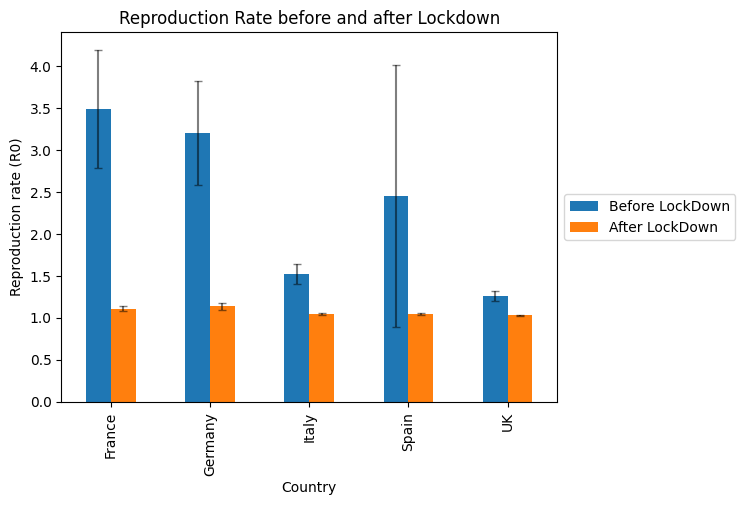

In [130]:
df = pd.DataFrame(data).T
df_sd = pd.DataFrame(sd).T
barplotReproduction(df,df_sd)

In [34]:
df

,0,1
France,3.49286,1.11192
Germany,3.20158,1.13869
Italy,1.52632,1.05137
Spain,2.45252,1.04717
UK,1.25934,1.03214


## Test

In [ ]:
# General Information
country_list = ["Italy", "United Kindgom", "Spain", "Switzerland", "France", "Germany"]
vmin = 0
vmax = 5
col = "Example"
fig, ax = plt.subplots(1, figsize=(20, 9))
ax.axis('off')
africa_map_df = geo_df[geo_df['NAME'].isin(country_list)]

# Plotting the desired continent
geo_df[(geo_df["CONTINENT"] == "Europe")].plot(column=col, ax=ax, color='white', edgecolor='black')

# Adding Cmap to 
cmap = 'viridis'
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
cbaxes = fig.add_axes([0.35, 0.25, 0.01, 0.5])
cbar = fig.colorbar(sm, cax=cbaxes)

# Setting Axis limits
ax.set_xlim(-30, 50)
ax.set_ylim(30, 70)